# Avacado anaylsis of Region, Type and Price (Kaggle Dataset)
    Megh Patel
    10/20/2020

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('avocado-updated-2020.csv')

In [3]:
data.shape

(30021, 13)

In [4]:
data.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [5]:
data.isnull().sum()

date             0
average_price    0
total_volume     0
4046             0
4225             0
4770             0
total_bags       0
small_bags       0
large_bags       0
xlarge_bags      0
type             0
year             0
geography        0
dtype: int64

# Prices Per Region 

<AxesSubplot:xlabel='average_price', ylabel='geography'>

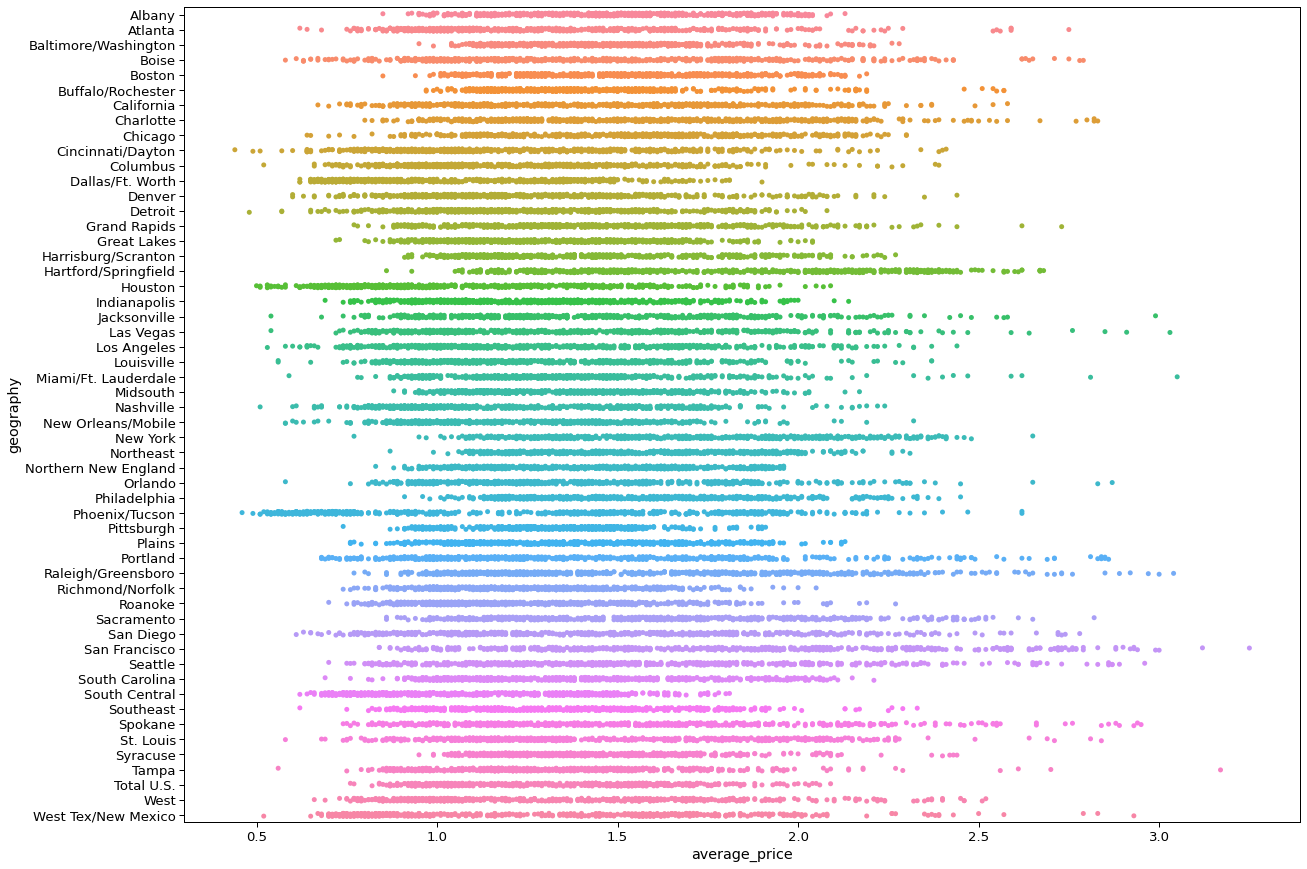

In [6]:
plt.figure(figsize=(20,15))
sns.set_context('paper', font_scale=1.5)
sns.stripplot(x='average_price',y='geography',data=data, jitter=True,
               dodge=True )

<AxesSubplot:xlabel='total_volume', ylabel='geography'>

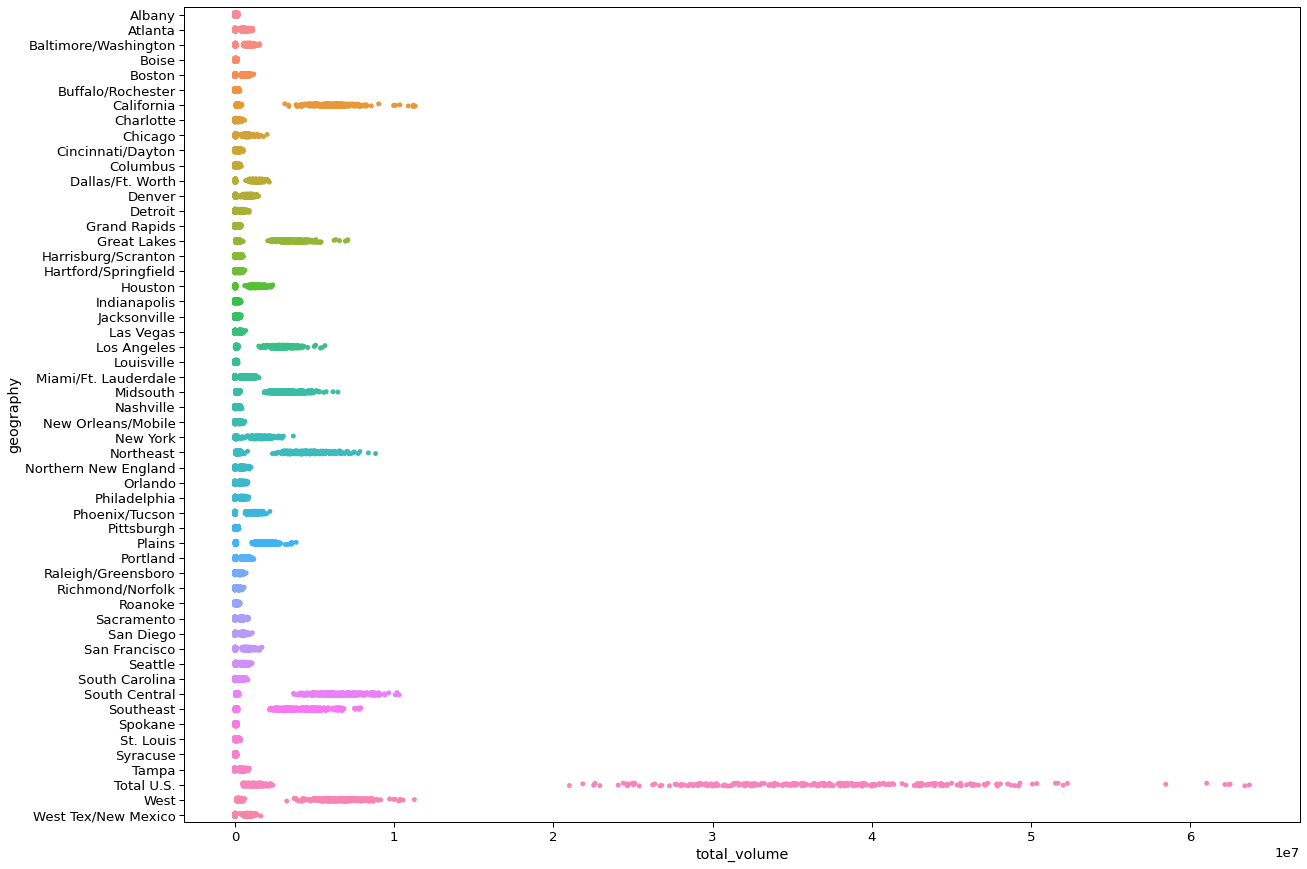

In [7]:
plt.figure(figsize=(20,15))
sns.set_context('paper', font_scale=1.5)
sns.stripplot(x='total_volume',y='geography',data=data, jitter=True,
               dodge=True )

# Three regions graphed (Southeast, West, California)

In [8]:
Southeast = data.loc[data.geography=='Southeast']
West = data.loc[data.geography=='West']
California = data.loc[data.geography=='California']

<AxesSubplot:xlabel='year', ylabel='total_volume'>

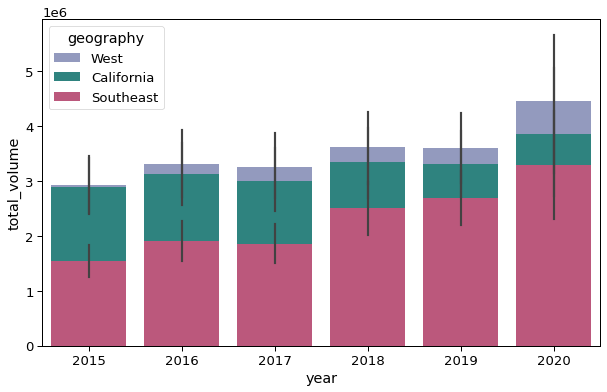

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(data=West, x="year", y="total_volume", hue='geography', palette='BuPu')
sns.barplot(data=California, x="year", y="total_volume", hue='geography',palette = 'viridis' )
sns.barplot(data=Southeast, x="year", y="total_volume", hue='geography', palette = 'plasma')

<AxesSubplot:xlabel='year', ylabel='total_volume'>

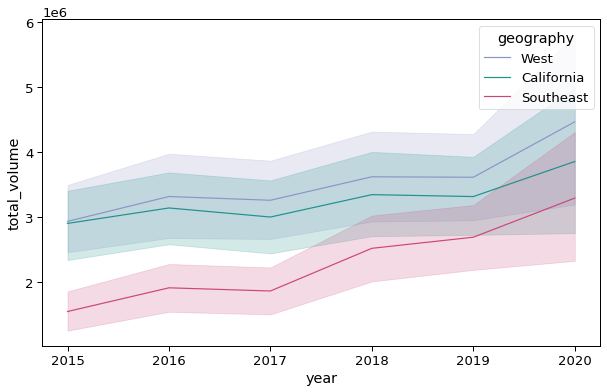

In [10]:
plt.figure(figsize=(10,6))
sns.lineplot(data=West, x="year", y="total_volume", hue='geography', palette='BuPu')
sns.lineplot(data=California, x="year", y="total_volume", hue='geography',palette = 'viridis' )
sns.lineplot(data=Southeast, x="year", y="total_volume", hue='geography', palette = 'plasma')

### From this we can take way the fact that the West produced the greatest amount of avacados after 2016 while the second highest was California and third was southeast 

# Organic and Conventional Prices and Volume 

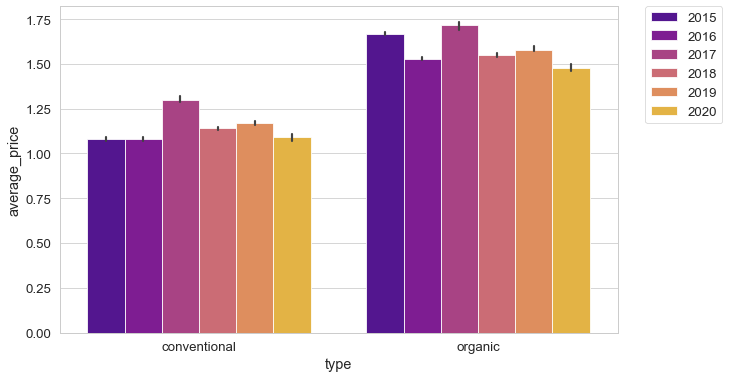

In [11]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.set_context('paper', font_scale=1.5)
sns.barplot(x='type',y='average_price',data=data, hue='year', estimator=np.median, palette = 'plasma')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

##### Conventional sold at a cheap price all year compared to organic, but sold cheaper in 2015 and 2017. while in 2017 conventional sold at a higher price compared to the previous years and same with organic as well. Then decreased the years after 

<AxesSubplot:xlabel='type', ylabel='total_volume'>

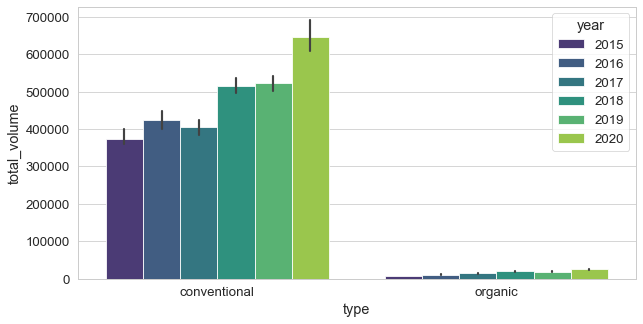

In [12]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.set_context('paper', font_scale=1.5)
sns.barplot(x='type',y='total_volume',data=data, hue='year', estimator=np.median, palette = 'viridis')

<AxesSubplot:xlabel='type', ylabel='total_volume'>

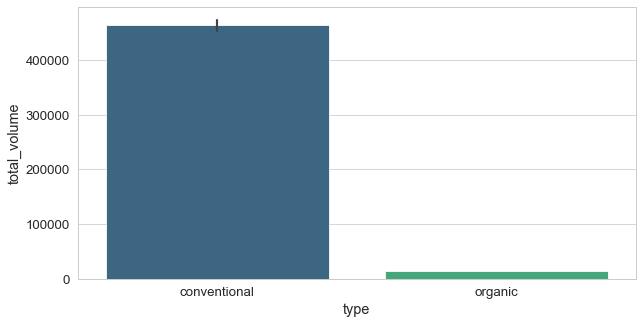

In [13]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.set_context('paper', font_scale=1.5)
sns.barplot(x='type',y='total_volume',data=data, estimator=np.median, palette = 'viridis')

# Modeling 

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
import joblib 

In [15]:
data.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [16]:
data['binaryType'] = LabelEncoder().fit_transform(data.type) 
data.drop(['date', 'type', 'year', 'geography','xlarge_bags'], axis=1, inplace=True)
data.drop(['4046','4225','4770'], axis=1, inplace=True)

<AxesSubplot:xlabel='average_price', ylabel='binaryType'>

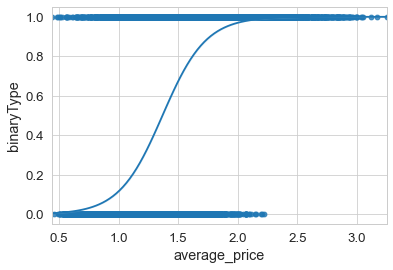

In [17]:
sns.regplot(x='average_price', y='binaryType', data=data, logistic=True)

In [18]:
X = data.drop('binaryType', axis=1)
y = data['binaryType']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=1)
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [20]:
predictions = model.predict(X_test)

In [21]:
classification_report(y_test,predictions)


'              precision    recall  f1-score   support\n\n           0       0.98      0.91      0.95      1979\n           1       0.92      0.98      0.95      1924\n\n    accuracy                           0.95      3903\n   macro avg       0.95      0.95      0.95      3903\nweighted avg       0.95      0.95      0.95      3903\n'

In [22]:
accuracy_score(y_test,predictions)

0.9479887266205483

# Reference

Kaggle Dataset by Timofei Kornev. 2020-08-04. Avocado Prices (2020), from https://www.kaggle.com/timmate/avocado-prices-2020/